In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install -q tensorflow-addons
import tensorflow_addons as tfa

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
# https://www.kaggle.com/datasets/mostafaabla/garbage-classification
root='/kaggle/input/garbage-classification/garbage_classification/'
data={}
for i in os.listdir(root):
    print(i)
    for j in os.walk(root+i):
        for k in j[2]:
            data[root+i+'/'+k]=i

metal
white-glass
biological
paper
brown-glass
battery
trash
cardboard
shoes
clothes
plastic
green-glass


In [4]:
data=pd.DataFrame(data.items(),columns=['path','label'])
data=data.sample(frac=1)
data

,path,label
12991,/kaggle/input/garbage-classification/garbage_c...,clothes
12284,/kaggle/input/garbage-classification/garbage_c...,clothes
9424,/kaggle/input/garbage-classification/garbage_c...,clothes
1447,/kaggle/input/garbage-classification/garbage_c...,white-glass
4088,/kaggle/input/garbage-classification/garbage_c...,brown-glass
...,...,...
4987,/kaggle/input/garbage-classification/garbage_c...,battery
3891,/kaggle/input/garbage-classification/garbage_c...,brown-glass
13988,/kaggle/input/garbage-classification/garbage_c...,clothes
1445,/kaggle/input/garbage-classification/garbage_c...,white-glass


In [5]:
# https://www.kaggle.com/datasets/mostafaabla/garbage-classification
root='/kaggle/input/unsplash-random-images-collection/'
neg_data=[]
for i in os.listdir(root):
    print(i)
    for j in os.walk(root+i):
        neg_data.append(j)

unsplash-images-collection


In [6]:
neg_data = neg_data[0][2]

In [7]:
def not_trash_label(entry):
    return "not-trash"

In [8]:
def add_full_path(path):
    absul = "/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/"
    path = absul + path
    return path

In [10]:
neg_data_df = pd.DataFrame({"path": neg_data})

In [11]:
neg_data_df["path"] = neg_data_df["path"].apply(add_full_path)
neg_data_df["label"] = neg_data_df["path"].apply(not_trash_label)

In [12]:
neg_data_df.head()

,path,label
0,/kaggle/input/unsplash-random-images-collectio...,not-trash
1,/kaggle/input/unsplash-random-images-collectio...,not-trash
2,/kaggle/input/unsplash-random-images-collectio...,not-trash
3,/kaggle/input/unsplash-random-images-collectio...,not-trash
4,/kaggle/input/unsplash-random-images-collectio...,not-trash


In [13]:
merged_df = pd.concat([data, neg_data_df])

In [14]:
merged_df["label"].value_counts()

clothes        5325
shoes          1977
paper          1050
biological      985
battery         945
cardboard       891
plastic         865
not-trash       802
white-glass     775
metal           769
trash           697
green-glass     629
brown-glass     607
Name: label, dtype: int64

In [15]:
new_data = merged_df[merged_df['label'].isin(['metal', 'white-glass', 'plastic', 'not-trash'])]
new_data = new_data.sample(frac=1)

In [16]:
new_data["label"].value_counts()

plastic        865
not-trash      802
white-glass    775
metal          769
Name: label, dtype: int64

In [17]:
#Setting the number of files we want in each class. This is the number of metal images in this case since that is the class with the least number of images. 
file_count = 769
#Create samples list for putting the number of images we want of each class in.
samples = []
#Iterate over each class in the dataframe.
for category in new_data['label'].unique():    
    #Slice the certain category.
    category_slice = new_data.query("label == @category")
    #Take a sample of file_count, set to 607 above, of each slice and set a random_state to make it repeatable. 
    samples.append(category_slice.sample(file_count, replace=False,random_state=666))
#Set the dataframe to the samples list. 
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=666).reset_index(drop=True)
#Print the amount of classes and the length of the dataframe to make sure we balanced the dataframe. 
print (df['label'].value_counts())
print (len(df))

not-trash      769
plastic        769
metal          769
white-glass    769
Name: label, dtype: int64
3076


In [18]:
def split_data(data,ratio):
    last=int(len(data)*ratio)
    return data[:last], data[last:]

In [19]:
train,test=split_data(df,.8)

In [20]:
train.to_csv('train_d.csv',index=False)
test.to_csv('test_d.csv',index=False)

In [21]:
train["label"].value_counts()

metal          623
plastic        618
white-glass    613
not-trash      606
Name: label, dtype: int64

In [22]:
test["label"].value_counts()

not-trash      163
white-glass    156
plastic        151
metal          146
Name: label, dtype: int64

In [23]:
train,valid=split_data(train,.9)

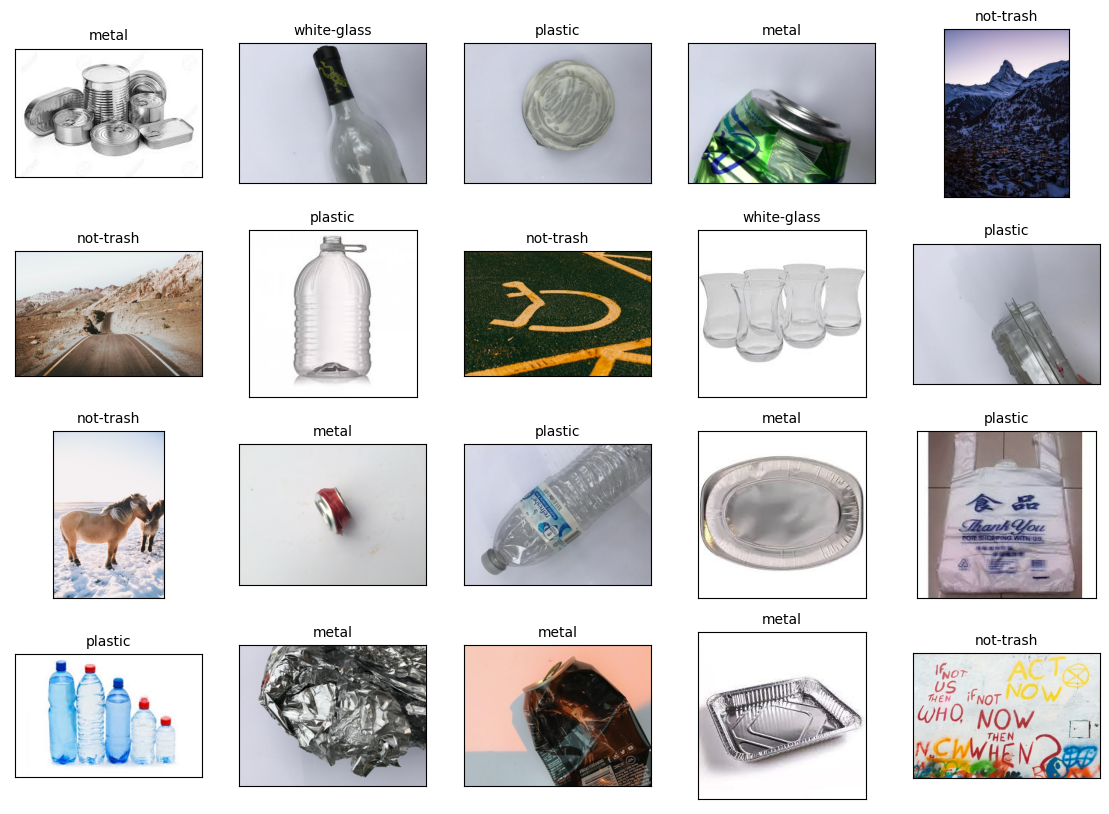

In [24]:
import matplotlib.pyplot as plt
import numpy as np
#Create a new matplotlib figure and make it 14 by 10 inches in size.
plt.figure(figsize=(14,10))
for i in range(20):
    #Find a random number which is inside of the dataset index.
    random = np.random.randint(1,len(df))
    #Create a subplot which is 4 by 5 and put the image in the i+1 position in the plot.
    plt.subplot(4,5,i+1)
    #Locate the image path within the dataframe using the random index we generated above.
    img = df.loc[random,"path"]
    #Use matplotlib to read and show the image. 
    plt.imshow(plt.imread(img))
    #Title the subplot by locating the label for the image in the dataframe using the same random index.
    plt.title(df.loc[random, "label"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])

#Show the plot of images.
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
size=224

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
train_images = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='path',
    y_col='label',
    batch_size=batch_size,
    target_size=(size, size),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=666,
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
val_images = train_datagen.flow_from_dataframe(
    dataframe=valid,
    x_col='path',
    y_col='label',
    batch_size=batch_size,
    target_size=(size, size),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=666,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
test_images = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='path',
    y_col='label',
    batch_size=batch_size,
    target_size=(size, size),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=666,
)

Found 2214 validated image filenames belonging to 4 classes.
Found 246 validated image filenames belonging to 4 classes.
Found 616 validated image filenames belonging to 4 classes.


In [17]:
!git clone https://github.com/AbdelrhmanNile/TrashVision

fatal: destination path 'TrashVision' already exists and is not an empty directory.


In [26]:
encoder = keras.models.load_model("TrashVision/machinelearning/autoencoder/encoder_model.h5")

In [27]:
# freeze encoder layers
for layer in encoder.layers:
    layer.freeze=True

In [28]:
import tensorflow_hub as hub
def get_from_hub(model_url):
    inputs = tf.keras.Input((224, 224, 3), name="inputt")
    hub_module = hub.KerasLayer(model_url,trainable=False, name="swin")
    outputs = hub_module(inputs)
    return tf.keras.Model(inputs, outputs)

In [29]:
swin_transformer = get_from_hub('https://tfhub.dev/sayakpaul/swin_tiny_patch4_window7_224_fe/1')

In [30]:
def se_block(inputs):
    input_channels = inputs.shape[-1]
    x = keras.layers.GlobalAveragePooling2D(name="gap1")(inputs)
    x = keras.layers.Dense(units=len(train_images.class_indices.keys()), activation="relu")(x)    
    x = keras.layers.Dense(units=input_channels, activation="sigmoid")(x)    
    x = tf.reshape(x, [-1, 1, 1, input_channels])
    x = inputs * x
    return x

In [31]:
def build_classifier():
    # swin feature extractor
    swin_output = swin_transformer.output
    x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(swin_output)
    x = keras.layers.Dense(512, kernel_regularizer = keras.regularizers.l2(l = 0.016),activity_regularizer=keras.regularizers.l1(0.006),
                           bias_regularizer=keras.regularizers.l1(0.006) ,activation='relu')(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(256,activation='relu')(x)
    x = keras.layers.Dropout(0.4)(x)
    x_swin = keras.layers.Dense(128, activation='relu')(x)
    
    # our encoder
    encoder_output = encoder.output
    x = se_block(encoder_output)
    x = keras.layers.GlobalAveragePooling2D(name="gap2")(x)
    x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
    x = keras.layers.Dense(512, kernel_regularizer = keras.regularizers.l2(l = 0.016),activity_regularizer=keras.regularizers.l1(0.006),
                           bias_regularizer=keras.regularizers.l1(0.006) ,activation='relu')(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(256,activation='relu')(x)
    x = keras.layers.Dropout(0.4)(x)
    x_encoder = keras.layers.Dense(128, activation='relu')(x)
    
    # concat swin features and encoder features
    x_conc = keras.layers.concatenate([x_encoder,x_swin])
    
    output = keras.layers.Dense(4, activation='softmax')(x_conc)
    
    return keras.models.Model(inputs=[encoder.input, swin_transformer.input], outputs=output)

In [34]:
model = build_classifier()

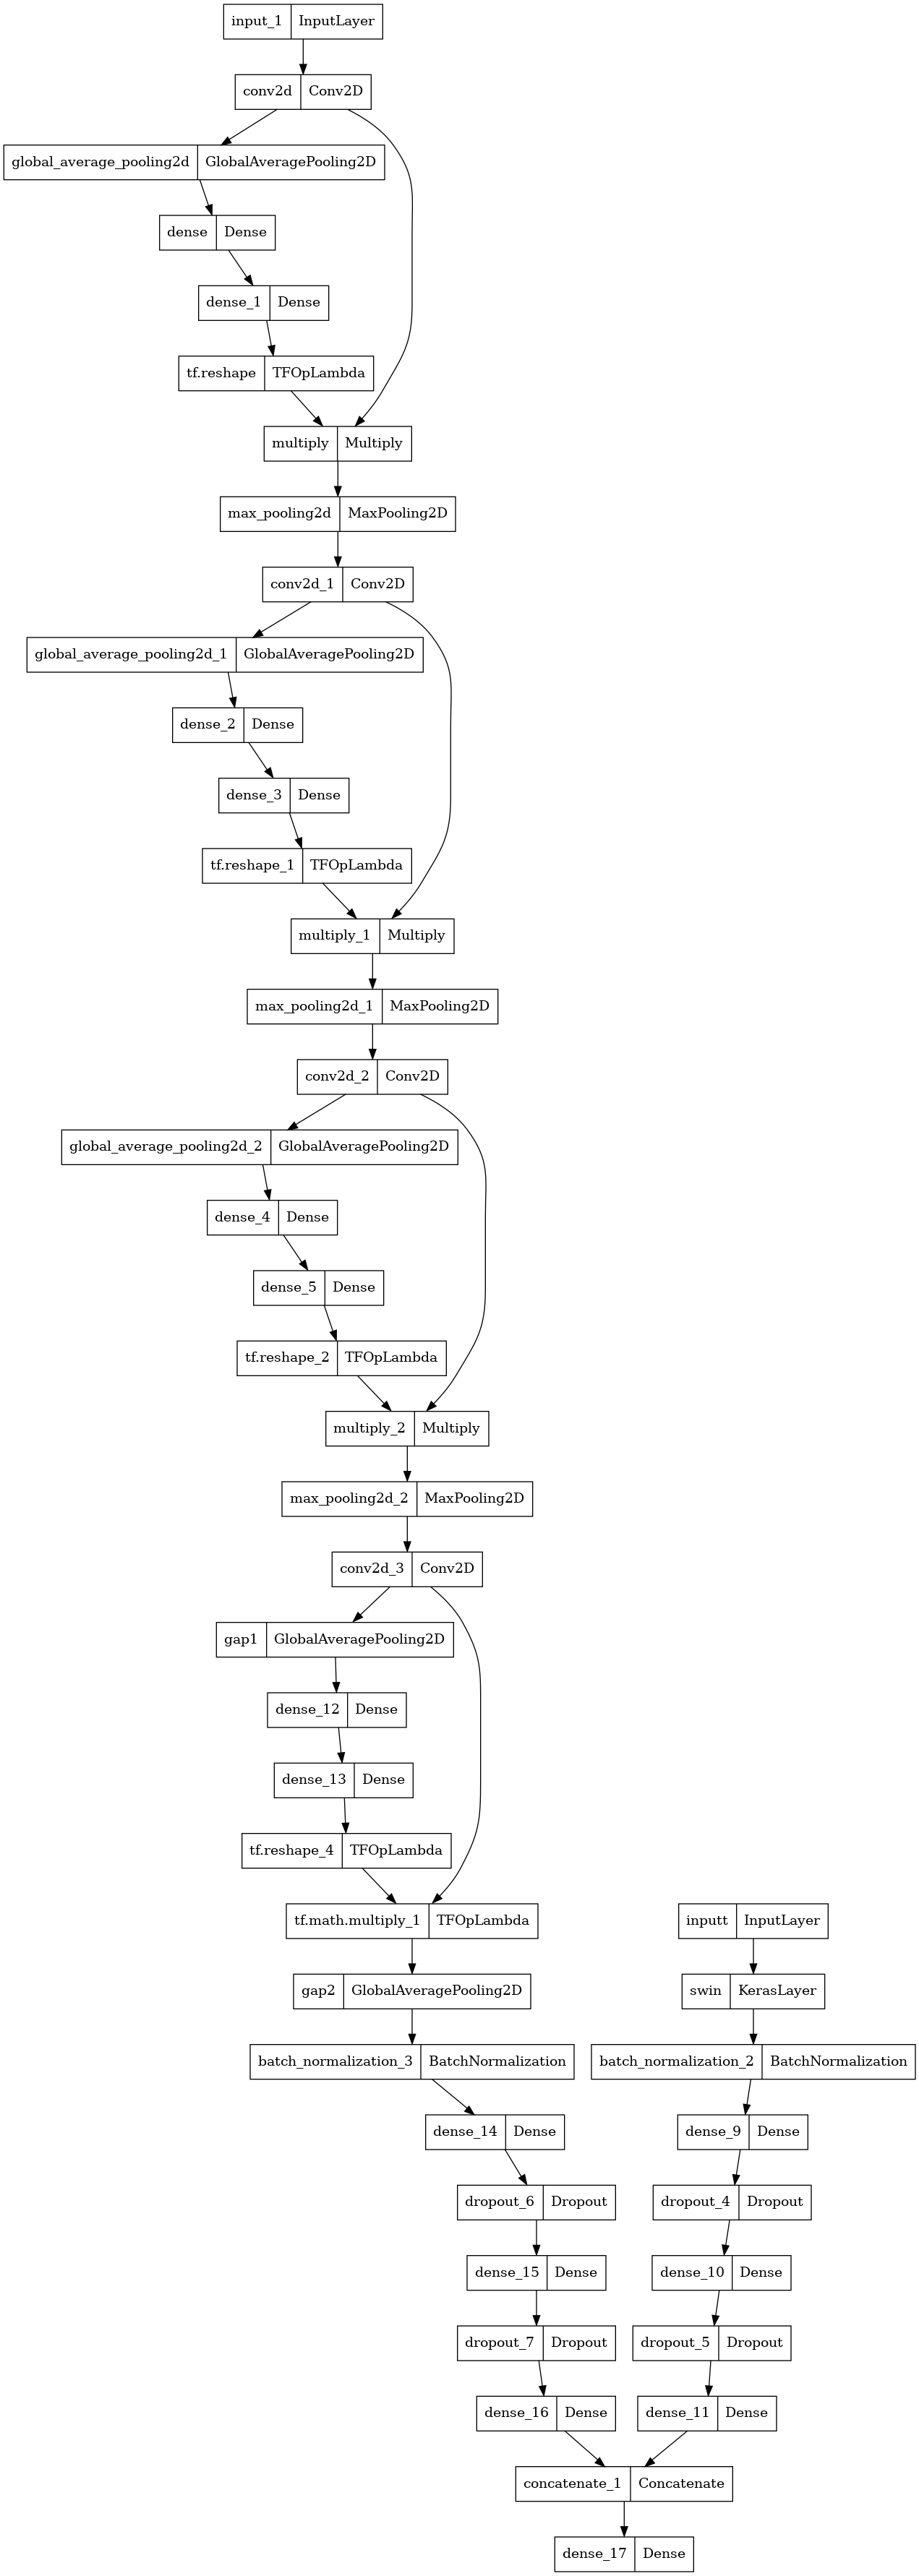

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [36]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 48  1344        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 global_average_pooling2d (Glob  (None, 48)          0           ['conv2d[0][0]']                 
 alAveragePooling2D)                                                                        

In [37]:
def gen_two_img(gen):
    while True:
        X1i = gen.next()
        yield [X1i[0],X1i[0]], X1i[1]

In [38]:
f1 = tfa.metrics.f_scores.F1Score(num_classes=4, average='micro', threshold=0.5)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=['accuracy', f1])

In [39]:
history = model.fit(
    gen_two_img(train_images),
    validation_data=gen_two_img(val_images), 
    validation_steps=val_images.n//batch_size,
    validation_batch_size=batch_size,
    steps_per_epoch=train_images.n//batch_size,
    batch_size=batch_size,
    epochs=50,
)

Epoch 1/50
138/138 [==============================] - 85s 421ms/step - loss: 9.3270 - accuracy: 0.7242 - f1_score: 0.6990 - val_loss: 6.0335 - val_accuracy: 0.8292 - val_f1_score: 0.5748
Epoch 2/50
138/138 [==============================] - 42s 303ms/step - loss: 4.4398 - accuracy: 0.8594 - f1_score: 0.8560 - val_loss: 2.9965 - val_accuracy: 0.8708 - val_f1_score: 0.8565
Epoch 3/50
138/138 [==============================] - 41s 301ms/step - loss: 2.4503 - accuracy: 0.8840 - f1_score: 0.8810 - val_loss: 1.7906 - val_accuracy: 0.9167 - val_f1_score: 0.8976
Epoch 4/50
138/138 [==============================] - 42s 307ms/step - loss: 1.5578 - accuracy: 0.8999 - f1_score: 0.8966 - val_loss: 1.2459 - val_accuracy: 0.8875 - val_f1_score: 0.8960
Epoch 5/50
138/138 [==============================] - 42s 303ms/step - loss: 1.1472 - accuracy: 0.9136 - f1_score: 0.9145 - val_loss: 1.0634 - val_accuracy: 0.9125 - val_f1_score: 0.9099
Epoch 6/50
138/138 [==============================] - 41s 296ms/s

(<Figure size 1500x500 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <AxesSubplot: title={'center': 'F1 Score'}, xlabel='Epochs', ylabel='F1 Score'>],
       dtype=object))

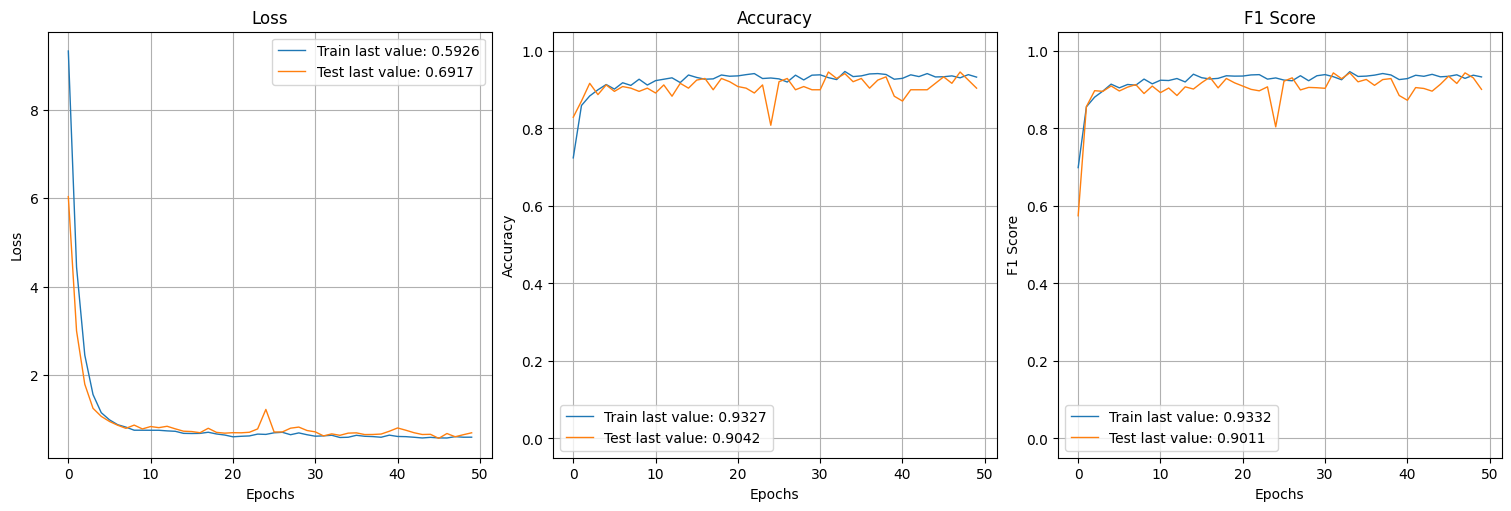

In [40]:
!pip install -q plot_keras_history
from plot_keras_history import plot_history
plot_history(history)

In [41]:
model.save("model_dropout_negcls_.h5")

In [42]:
labels = train_images.class_indices.keys()

In [43]:
labels

dict_keys(['metal', 'not-trash', 'plastic', 'white-glass'])

In [44]:
def prediction_generator(test_images):
    k=0
    for x in test_images:
        k+=len(x[1])
        yield [x[0],x[0]], x[1]
        if(k>=test_images.n):
            break

In [60]:
def pred(img):
    labels =['metal', 'not-trash', 'plastic', 'white-glass']
    im = np.expand_dims(img, 0)
    pred = model.predict([im, im])
    print(pred)
    idx = np.argmax(pred, 1)[0]
    return labels[idx]
    

In [54]:
!wget https://hips.hearstapps.com/hmg-prod/images/edc050122baldissera-008-1649868404.jpg?crop=1xw:1xh;center,top&resize=980:*

--2023-05-24 16:28:43--  https://hips.hearstapps.com/hmg-prod/images/edc050122baldissera-008-1649868404.jpg?crop=1xw:1xh
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 725694 (709K) [image/jpeg]
Saving to: ‘edc050122baldissera-008-1649868404.jpg?crop=1xw:1xh’

edc050122baldissera 100%[===================>] 708.69K  --.-KB/s    in 0.05s   

2023-05-24 16:28:43 (14.1 MB/s) - ‘edc050122baldissera-008-1649868404.jpg?crop=1xw:1xh’ saved [725694/725694]



In [47]:
import cv2


In [55]:
test_im = cv2.imread("/kaggle/working/edc050122baldissera-008-1649868404.jpg?crop=1xw:1xh")

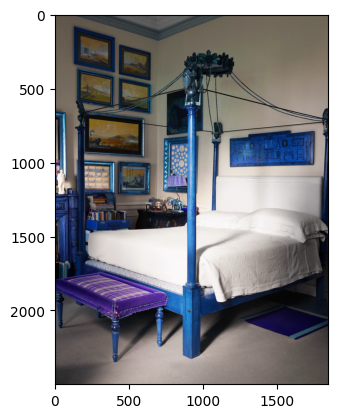

In [56]:
plt.imshow(test_im)

In [57]:
resized = cv2.resize(test_im, (224,224))

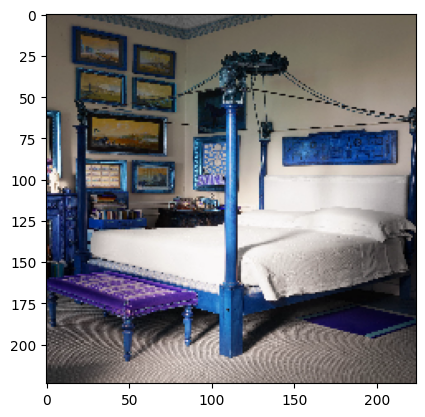

In [61]:
plt.imshow(resized)

In [62]:
pred(resized/255.0)

1/1 [==============================] - 0s 64ms/step
[[1.4186932e-05 9.9996817e-01 1.4223359e-05 3.3806712e-06]]


'not-trash'